In [8]:
import pandas as pd
from openbb import obb
import matplotlib.pyplot as plt

pd.set_option('display.width',       None)
pd.set_option('display.max_columns', None)

## Profile

In [74]:
pd.Series({ k:v for k,v in obb.equity.profile('MSFT').results[0] })

symbol                                                                     MSFT
name                                                      Microsoft Corporation
cik                                                                        None
cusip                                                                      None
isin                                                                       None
lei                                                                        None
legal_name                                                                 None
stock_exchange                                                              NMS
sic                                                                        None
short_description                                                          None
long_description              Microsoft Corporation develops and supports so...
ceo                                                                        None
company_url                             

## Quote

In [73]:
pd.Series({ k:v for k,v in obb.equity.price.quote('MSFT').results[0] })

symbol                                    MSFT
asset_type                              EQUITY
name                     Microsoft Corporation
exchange                                   NMS
bid                                     407.82
bid_size                                   300
bid_exchange                              None
ask                                     427.97
ask_size                                   100
ask_exchange                              None
quote_conditions                          None
quote_indicators                          None
sales_conditions                          None
sequence_number                           None
market_center                             None
participant_timestamp                     None
trf_timestamp                             None
sip_timestamp                             None
last_price                              408.43
last_tick                                 None
last_size                                 None
last_timestam

## Historical

In [71]:
def obb_equity_historical(SYMBOLS):
    Pipe = []
    for i, SYMBOL in enumerate(SYMBOLS): 
        try: 
            print(i, SYMBOL)
            X = obb.equity.price.historical(SYMBOL).results
            Pipe.append(pd.DataFrame([{ 'symbol':SYMBOL, **x.__dict__ } for x in X]))
        except Exception as E: 
            print(i, SYMBOL, E)
    pass
    return pd.concat(Pipe, ignore_index=1) 

obb_equity_historical(['MSFT','GOOG','META'])

0 MSFT
1 GOOG
2 META


,symbol,date,open,high,low,close,volume,vwap,split_ratio,dividend
0,MSFT,2024-02-16,407.959991,408.290009,403.440002,404.059998,22281100,None,None,0.0
1,MSFT,2024-02-20,403.239990,404.489990,398.010010,402.790009,24307900,None,None,0.0
2,MSFT,2024-02-21,400.170013,402.290009,397.220001,402.179993,18631100,None,None,0.0
3,MSFT,2024-02-22,410.190002,412.829987,408.570007,411.649994,27009900,None,None,0.0
4,MSFT,2024-02-23,415.670013,415.859985,408.970001,410.339996,16295900,None,None,0.0
...,...,...,...,...,...,...,...,...,...,...
745,META,2025-02-10,718.559998,721.200012,711.330017,717.400024,12904300,None,None,0.0
746,META,2025-02-11,713.320007,723.659973,710.039978,719.799988,12998000,None,None,0.0
747,META,2025-02-12,715.299988,727.099976,712.599976,725.380005,12016500,None,None,0.0
748,META,2025-02-13,721.520020,729.000000,718.039978,728.559998,12569100,None,None,0.0


## Search

In [76]:
pd.DataFrame([x.__dict__ for x in obb.equity.search().results])

,symbol,name,cik
0,AAPL,Apple Inc.,320193
1,NVDA,NVIDIA CORP,1045810
2,MSFT,MICROSOFT CORP,789019
3,AMZN,AMAZON COM INC,1018724
4,GOOGL,Alphabet Inc.,1652044
...,...,...,...
9711,DRDBW,Roman DBDR Acquisition Corp. II,2032528
9712,NTWOW,Newbury Street II Acquisition Corp,2028027
9713,NTWOU,Newbury Street II Acquisition Corp,2028027
9714,SNDKV,Sandisk Corp,2023554


## Discovery

In [ ]:
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.active().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.aggressive_small_caps().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.gainers().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.growth_tech().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.losers().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.undervalued_growth().results])
# pd.DataFrame([x.__dict__ for x in obb.equity.discovery.undervalued_large_caps().results])

## Screener

In [46]:
def obb_equity_screener():
    return pd.DataFrame([ x.__dict__ for x in obb.equity.screener(limit=10_000).results ])

Scrn = obb_equity_screener()
Scrn.head()

,symbol,name,price,change,percent_change,volume,open,high,low,previous_close,ma50,ma200,year_high,year_low,market_cap,shares_outstanding,book_value,price_to_book,eps_ttm,eps_forward,pe_forward,dividend_yield,exchange,exchange_timezone,earnings_date,currency
0,WRD,WERIDE INC.,31.50,14.330000,0.834595,21075358,35.73,42.2400,27.53,17.17,15.1234,15.784671,42.24,12.22,8.646529e+09,256220992.0,-62.164,-0.506724,-1.15,NaN,NaN,0.0,NGM,America/New_York,2024-11-29 16:30:00-05:00,USD
1,UDMY,"Udemy, Inc.",10.01,2.190000,0.280051,7022015,8.57,10.6100,8.20,7.82,8.0786,8.272700,11.65,6.67,1.460469e+09,145900992.0,1.345,7.442379,-0.56,0.37,27.054054,0.0,NMS,America/New_York,2025-02-13 16:05:00-05:00,USD
2,RXRX,"Recursion Pharmaceuticals, Inc.",10.53,2.030000,0.238823,83547150,9.15,10.7550,9.04,8.50,7.2945,7.439275,15.74,5.60,4.114302e+09,383724000.0,1.833,5.744681,-1.54,-1.73,-6.086705,0.0,NMS,America/New_York,None,USD
3,KC,Kingsoft Cloud Holdings Limited,20.81,3.459999,0.199424,7645031,20.27,21.6900,20.26,17.35,11.4173,5.160575,21.69,2.02,4.941813e+09,237472992.0,21.459,0.969756,-1.17,-0.41,-50.756096,0.0,NMS,America/New_York,2024-11-19 06:24:15-05:00,USD
4,GT,The Goodyear Tire & Rubber Comp,9.58,1.410000,0.172583,21622031,8.92,10.0179,8.88,8.17,9.1408,9.822750,13.86,7.27,2.729534e+09,284920000.0,16.689,0.574031,0.24,1.41,6.794326,0.0,NMS,America/New_York,2025-02-13 17:18:54-05:00,USD


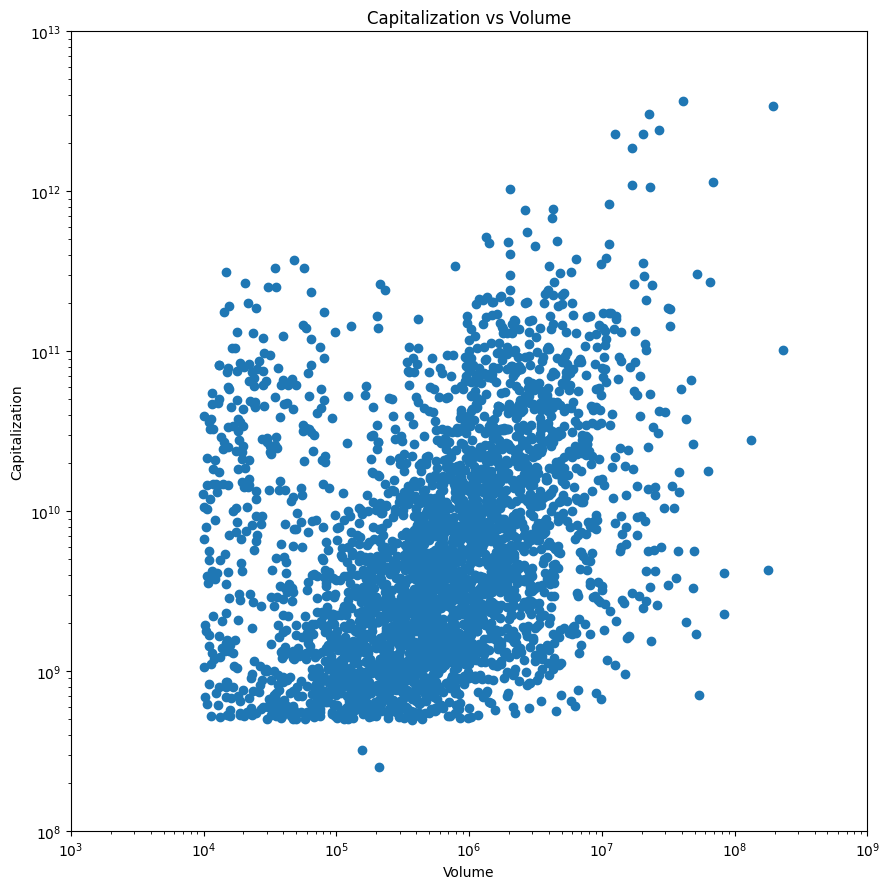

In [65]:
plt.figure(figsize=(9,9))
plt.title('Capitalization vs Volume')

X,Y,Z = Scrn['volume'], Scrn['market_cap'], Scrn['symbol']
plt.scatter(x=X, y=Y)
# [plt.text(*xyz) for xyz in zip(X,Y,Z)]

plt.xlabel('Volume');     plt.ylabel('Capitalization'); 
plt.xscale('log');        plt.yscale('log'); 
plt.xlim(1e3, 1e9);       plt.ylim(1e8, 1e13); 
plt.tight_layout()
plt.show()